# CIL Road Segmentation Project 2020
Group Roadtripper


*   Tommaso
*   Yihang
*   Zhenhan
*   Jonas


---



# Establishment of the working environment
First, we have to import some needed python helper libraries like numpy. Then we need to import Keras, which is built on top of Tensorflow.

In [1]:
# Import Colab libraries
from google.colab import drive
import os

# Import Numpy and Mathplot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import scikit-learn
from sklearn.model_selection import train_test_split

# Import Keras with backend Tensorflow
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.layers import *
from tensorflow.python.keras import Sequential
import keras
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# Test, if Google Colab runs in GPU mode
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
# Mount Google Drive to virtual machine
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
# Change directory to working folder
cd 'drive/My Drive/Daten/Jahr 2020/Studium/Semester 8/Computational Intelligence Lab/Road Segmentation Project/model/model 3.0'

/content/drive/My Drive/Daten/Jahr 2020/Studium/Semester 8/Computational Intelligence Lab/Road Segmentation Project/model/model 3.0


# Image Import
First, we load the training images and their coresponding ground truth in the numpy array x_train and y_train. Then we split the available data into training and validation data.

In [5]:
# Load images

# Root directory for training samples
root_dir = "training/"

# Folder with satelite images
x_directory = root_dir + "images/"

# Folder with groundtruth images
y_directory = root_dir + "groundtruth/"

# List all images
files = os.listdir(x_directory)

# Get image length
n = len(files)

print("Loading " + str(n) + " satelite images into x_train")
x_train = np.asarray([mpimg.imread(x_directory + files[i]) for i in range(n)])


print("Loading " + str(n) + " ground-truth images into y_train")
y_train = np.asarray([mpimg.imread(y_directory + files[i]) for i in range(n)])

Loading 100 satelite images into x_train
Loading 100 ground-truth images into y_train


In [7]:
# Print the shape of both arrays
print("x_train shape: " + str(x_train.shape))
print("y_train shape: " + str(y_train.shape))

x_train shape: (100, 456, 456, 3)
y_train shape: (100, 456, 456, 3)


In [0]:
# Split training and validation data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("---------------------------")
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (90, 456, 456, 3)
y_train:  (90, 456, 456, 3)
---------------------------
x_val:  (10, 456, 456, 3)
y_val:  (10, 456, 456, 3)


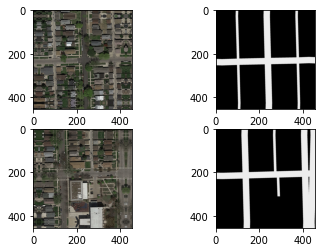

In [8]:
# Plot two images and the corresponding ground truth images
index = 0

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(x_train[index])
axarr[0,1].imshow(y_train[index])
axarr[1,0].imshow(x_train[index+1])
axarr[1,1].imshow(y_train[index+1])

# Building the Convolutional Neural Network
We define the CNN model and have the option to visualize it or print out the summary of it.

In [0]:
# Define the CNN model
model = Sequential([
        Conv2D(64, (5,5), input_shape=(72,72,3), padding="same", name="1_Convolution"),
        LeakyReLU(alpha=0.1, name="1_Leaky"),
        MaxPooling2D(pool_size=(2, 2), padding="same", name="1_MaxPooling"),
        Dropout(0.25, name="1_Dropout"),

        Conv2D(128, (3,3), padding="same", name="2_Convolution"),
        LeakyReLU(alpha=0.1, name="2_Leaky"),
        MaxPooling2D(pool_size=(2, 2), padding="same", name="2_MaxPooling"),
        Dropout(0.25, name="2_Dropout"),

        Conv2D(256, (3,3), padding="same", name="3_Convolution"),
        LeakyReLU(alpha=0.1, name="3_Leaky"),
        MaxPooling2D(pool_size=(2, 2), padding="same", name="3_MaxPooling"),
        Dropout(0.25, name="3_Dropout"),

        Conv2D(256, (3,3), padding="same", name="4_Convolution"),
        LeakyReLU(alpha=0.1, name="4_Leaky"),
        MaxPooling2D(pool_size=(2, 2), padding="same", name="4_MaxPooling"),
        Dropout(0.25, name="4_Dropout"),

        Flatten(name="5_Flatten"),
        Dense(128, kernel_regularizer=keras.regularizers.l2(1e-6), name="5_Dense"),
        LeakyReLU(alpha=0.1, name="5_Leaky"),
        Dropout(0.5, name="5_Dropout"),

        Dense(2, activation="softmax", kernel_regularizer=keras.regularizers.l2(1e-6), name="6_Dense")
])

In [0]:
# Model visualization
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1_Convolution (Conv2D)       (None, 72, 72, 64)        4864      
_________________________________________________________________
1_Leaky (LeakyReLU)          (None, 72, 72, 64)        0         
_________________________________________________________________
1_MaxPooling (MaxPooling2D)  (None, 36, 36, 64)        0         
_________________________________________________________________
1_Dropout (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
2_Convolution (Conv2D)       (None, 36, 36, 128)       73856     
_________________________________________________________________
2_Leaky (LeakyReLU)          (None, 36, 36, 128)       0         
_________________________________________________________________
2_MaxPooling (MaxPooling2D)  (None, 18, 18, 128)       0

# Preprocessing: Image Patch Generator
We have to preprocess the images in order to feed them into the neural network. We do this by creating a python generator which produces training batches of patches, which have a size of 72x72px. This patches are extracted out of the training data images. The center 16x16px is being labeled either 0/1 using the groundtruth image. We augment the patches by rotating and flipping them randomly to have more training samples.

The same is done for the validation set.

In [0]:
# Define the python generator, which outputs augmented image batches for training
def training_generator():
            batch_size=125
            window_size=72
            patch_size=16
            nb_classes = 2

            while 1:
                # Generate one minibatch
                X_batch = np.empty((batch_size, window_size, window_size, 3))
                Y_batch = np.empty((batch_size, 2))
                for i in range(batch_size):
                    # Select a random image
                    idx = np.random.choice(x_train.shape[0])
                    shape = x_train[idx].shape
                    
                    # Sample a random window from the image
                    center = np.random.randint(window_size//2, shape[0] - window_size//2, 2)
                    sub_image = x_train[idx][center[0]-window_size//2:center[0]+window_size//2,
                                       center[1]-window_size//2:center[1]+window_size//2]
                    gt_sub_image = y_train[idx][center[0]-patch_size//2:center[0]+patch_size//2,
                                          center[1]-patch_size//2:center[1]+patch_size//2]
                    
                    # The label does not depend on the image rotation/flip (provided that the rotation is in steps of 90°)
                    threshold = 0.25
                    label = (np.array([np.mean(gt_sub_image)]) > threshold) * 1
                    
                    # Image augmentation
                    # Random flip
                    if np.random.choice(2) == 0:
                        # Flip vertically
                        sub_image = np.flipud(sub_image)
                    if np.random.choice(2) == 0:
                        # Flip horizontally
                        sub_image = np.fliplr(sub_image)
                    
                    # Random rotation in steps of 90°
                    num_rot = np.random.choice(4)
                    sub_image = np.rot90(sub_image, num_rot)

                    label = np_utils.to_categorical(label, nb_classes)
                    X_batch[i] = sub_image
                    Y_batch[i] = label
                
                    
                yield (X_batch, Y_batch)


In [0]:
# Create validation set

def validation_generator():
            batch_size=8000
            window_size=72
            patch_size=16
            nb_classes = 2

            while 1:
                # Generate one minibatch
                X_batch = np.empty((batch_size, window_size, window_size, 3))
                Y_batch = np.empty((batch_size, 2))
                for i in range(batch_size):
                    # Select a random image
                    idx = np.random.choice(x_val.shape[0])
                    shape = x_val[idx].shape
                    
                    # Sample a random window from the image
                    center = np.random.randint(window_size//2, shape[0] - window_size//2, 2)
                    sub_image = x_val[idx][center[0]-window_size//2:center[0]+window_size//2,
                                       center[1]-window_size//2:center[1]+window_size//2]
                    gt_sub_image = y_val[idx][center[0]-patch_size//2:center[0]+patch_size//2,
                                          center[1]-patch_size//2:center[1]+patch_size//2]
                    
                    # The label does not depend on the image rotation/flip (provided that the rotation is in steps of 90°)
                    threshold = 0.25
                    label = (np.array([np.mean(gt_sub_image)]) > threshold) * 1
                    
                    # Image augmentation
                    # Random flip
                    if np.random.choice(2) == 0:
                        # Flip vertically
                        sub_image = np.flipud(sub_image)
                    if np.random.choice(2) == 0:
                        # Flip horizontally
                        sub_image = np.fliplr(sub_image)
                    
                    # Random rotation in steps of 90°
                    num_rot = np.random.choice(4)
                    sub_image = np.rot90(sub_image, num_rot)

                    label = np_utils.to_categorical(label, nb_classes)
                    X_batch[i] = sub_image
                    Y_batch[i] = label
                
                    
                yield (X_batch, Y_batch)


[0. 1.]
(125, 72, 72, 3)
(125, 2)


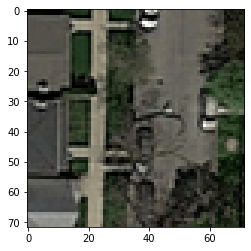

In [0]:
# Test training data generator
x_train_batch, y_train_batch = next(training_generator())

# Plot a test image
plt.imshow(x_train_batch[0])

# And the corresponding one hot enconding of y
print(y_train_batch[0])

# Shape of x_train_batch
print(x_train_batch.shape)

# Shape of y_train_batch
print(y_train_batch.shape)

In [0]:
# Create validation set
x_val_batch, y_val_batch = next(validation_generator())

# Shape of x_train_batch
print(x_val_batch.shape)

# Shape of y_train_batch
print(y_val_batch.shape)

(8000, 72, 72, 3)
(8000, 2)


# Training the model
First we have to compile the model and define the callback functions, which are being called each epoch. After that, it is finally time for training. After the training is finished the weights are saved in the current working directory for later usage.

In [0]:
# Compile the model
model.compile(Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
# Define callback functions (reduce the learning rate if accuracy doesn't change that much and early stopping, when accuracy doesn't change anymore.)
reduce_learningrate = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=5, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
early_stopping = EarlyStopping(monitor='accuracy', min_delta=0.0001, patience=11, verbose=1, mode='auto')
checkpoint = ModelCheckpoint("weights/weights.{epoch:02d}-{accuracy:.4f}.h5", monitor='accuracy')

In [13]:
# Train model with validation data
history = model.fit(training_generator(), validation_data=(x_val_batch, y_val_batch), steps_per_epoch=1500, epochs=200, callbacks=[reduce_learningrate, early_stopping])
model.save("model.h5", overwrite=True)

NameError: ignored

In [0]:
# Train model without validation data and save the weights of each epoch
history = model.fit(training_generator(), steps_per_epoch=10000, epochs=200, callbacks=[reduce_learningrate, early_stopping, checkpoint])

In [0]:
model.save("model.h5", overwrite=True, include_optimizer=False)

# Training Visualization
By looking at the model accuracy and loss plot of training and validation data, one can see, if the model is overfitting or underfitting and when it is a good time to stop training.

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: ignored

# How to prevent Google Colab from disconnecting?
Set a javascript interval to click on the connect button every 60 seconds. Open developer-settings (in your web-browser) with Ctrl+Shift+I then click on console tab and type this on the console prompt.


```
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);
```



In [0]:
x_test = np.load("testing/x_test.npy")

In [0]:
y_test = model.predict(x_test)

In [0]:
y_test = np.argmax(y_test, axis=1)

In [0]:
import pandas as pd
pd.Series(y_test).to_csv("y_test.csv", header=False, index=False)